In order to run this notebook locally you will need
- a local instsallation of feltor: follow the quick-start guide https://github.com/feltor-dev/feltor (we do need jsoncpp and netcdf, but not glfw, and a link to path/to/feltor/inc/dg in home/include)
- a local installation of simplesimdb: follow the quick-start guide https://github.com/mwiesenberger/simplesimdb
- a local installation of feltorutilities (for parameters): https://github.com/mwiesenberger/feltorutilities
- to compile the cpp codes in this repository: type make in a shell

### Plasma two-fluid equations with temperature

We investigate the two-fluid equations with temperature (also known as two-fluid Euler-Poisson system)
 \begin{align}
     \frac{\partial }{\partial t} n_e&= - \frac{\partial}{\partial x} (u_en_e )  \\
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i )   \\   
    \frac{\partial }{\partial t} n_eu_e&= - \frac{\partial}{\partial x} n_eu_e^2 - \frac{1}{\mu_e}\frac{\partial}{\partial x} T_e n_e - \frac{z_e}{\mu_e} n_e\frac{\partial}{\partial x} \phi + \frac{R}{\mu_e}+ \frac{\partial}{\partial x} \left( \nu_{u,e}\frac{\partial}{\partial x} u_e\right)\\
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{1}{\mu_i}\frac{\partial}{\partial x} n_iT_i - \frac{z_i}{\mu_i}n_i\frac{\partial}{\partial x} \phi - \frac{R}{\mu_i} + \frac{\partial}{\partial x} \left( \nu_{u,i}\frac{\partial}{\partial x} u_i\right)\\
      \frac{1}{2 }\frac{\partial }{\partial t} n_eT_e &= -\frac{1}{2 }\frac{\partial}{\partial x} n_e T_e u_e - n_eT_e \frac{\partial}{\partial x} u_e + \nu_{u,e} \left(\frac{\partial}{\partial x} u_e\right)^2 -\frac{\partial}{\partial x} q_e + Q_e\\
       \frac{1}{2 }\frac{\partial }{\partial t} n_iT_i &= -\frac{1}{2 }\frac{\partial}{\partial x} n_i T_i u_i - n_iT_i \frac{\partial}{\partial x} u_i + \nu_{u,i} \left(\frac{\partial}{\partial x} u_i\right)^2  - \frac{\partial}{\partial x} q_i + Q_i
 \end{align}
 which is closed by the one-dimensional Poisson equation
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - n_e}{\epsilon_D}
 \end{align}
 
 where we have Gyro-Bohm normalization and $\mu_e = m_e/m_i$, $\mu_i = 1$, $z_e = -1$, $z_i = 1$. Last, we have the Debye parameter $\epsilon_D = \lambda_D^2 / \rho_s^2$ with the Debye length $\lambda_D$ and the
 ion gyro-radius at electron temperature $\rho_s$.
 
 Also note that we choose Bohm normalization based on gyro-radius $\rho_s$ and gyro-frequency $\Omega_{ci}$  because this is how we normalize the three-dimensional model. However, there is no magnetic field in the model and so the gyration does not appear. The more natural normalisation uses plasma frequency and Debye length, which makes the $\epsilon_D$ parameter disappear {cite}`Sack1987`. 
 
 The resistive, conductive and heat generative terms are given by
 \begin{align}
  R&= \eta n_i (n_i u_i - n_e u_e) - 0.71 n_e \frac{\partial}{\partial x} T_e \\
  q_e &= 0.71 n_e T_e ( u_e - u_i) - \nu_{t,e} \frac{\partial}{\partial x} T_e \\
  q_i &= - \nu_{t,i} \frac{\partial}{\partial x} T_i \\
  Q_i &= Q_\Delta = 5.88 \eta n_e^2 (T_e-T_i)\\
  Q_e &= -Q_\Delta -R(u_e-u_i) \\
 \end{align}
 
 
 The spatial domain is given by
$[-L_\parallel /2 ; L_\parallel/2]$, where $L_\parallel = 2\pi q R_0$ with $q=3$ and $R_0=0.545$m approximating the length of a fieldline from divertor to divertor in the Compass SOL. We use $N_x$ points.
 
 #### Neutral fluid limit
 We reach the limit of Navier Stokes fluid equations by first setting
 $\mu_e = 0$. Then we find from the electron momentum equation $ \partial_x T_e n_e - n_e\partial_x \phi +R = 0$. In the limit $\epsilon_D = 0$ we have $n_e=n_i$, which
yields the force term $- \partial_x ( nT_i +nT_e)$ in the ion momentum equation. In the limit $\epsilon_D=0$ the
ion continuity and ion momentum equations thus decouple from the system and yield the Navier Stokes equations.

#### Adiabatic electrons
We here assume an equation of state for the electrons
$n_e = n_{e,0}\exp(\phi/T_e)$.  Further setting $T_e=T_i$ we get
 \begin{align}
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i ) + S_{n} \\   
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{\partial}{\partial x} n_i T_i - n_i\frac{\partial}{\partial x} \phi + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i \\
     \frac{1}{2 }\frac{\partial }{\partial t} n_iT_i &= -\frac{1}{2 }\frac{\partial}{\partial x} n_i T_i u_i - n_iT_i \frac{\partial}{\partial x} u_i + \nu_{u,i} \left(\frac{\partial}{\partial x} u_i\right)^2  -\frac{\partial}{\partial x} q_i
 \end{align}
 which is closed by the one-dimensional non-linear Poisson   equation (choosing $n_{e,0}=1$)
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - \exp(\phi/T_i)}{\epsilon_D}
 \end{align}

In this section we use **dimensional** $n$, $T$

For the parallel viscosity $\mu_\parallel$ and the parallel resistivity $\eta_\parallel$ we
use the parallel resistive and viscous terms from the Braginskii fluid equations {Braginskii1965}.
The electron-ion and ion-ion collision frequencies are given by
$\nu_{ei} = \sqrt{2} z^2 e^4 \ln \Lambda n_e / (12\pi^{3/2} \sqrt{m_e} \epsilon_0^2 T_e^{3/2})$, $\nu_{ee} = \nu_{ei}/\sqrt{2}$
and
$\nu_{ii} =  z^4 e^4 \ln \Lambda n_i / (12\pi^{3/2} \sqrt{m_i} \epsilon_0^2 T_i^{3/2}) = \nu_{ei} \sqrt{m_e/m_i}/ ( (T_i/T_e)^{3/2} \sqrt{2})$.
We define with the parallel Spitzer resistivity
$\eta_\parallel := 0.51\frac{ m_e \nu_{ei}}{n_e e^2}$ and the parallel electron and ion viscosities
$\mu_{\parallel,e}:=0.73\frac{n_eT_e}{\nu_{ei}}$ and $\mu_{\parallel,i} = 0.96\frac{n_iT_i}{\nu_{ii}}$ {Braginskii1965} the dimensionless parameter
\begin{align}
    \eta&:=\frac{en_0\eta_\parallel}{B_0} = 0.51\frac{\nu_{ei,0}}{\Omega_{e0}} \nonumber\\
    &=
    8.45\cdot 10^{-5}\ln \lambda \left(\frac{n_0}{10^{19}\text{m}^3}\right)
    \left(\frac{T_0}{\text{eV}}\right)^{-3/2}
    \left(\frac{B_0}{\text{T}}\right)^{-1}\left(\frac{T_e}{T_0}\right)^{-3/2}
    \equiv \eta_0  \left(\frac{T_e}{T_0}\right)^{-3/2},
    \label{eq:resistivity}
\end{align}
with $\nu_{ei,0} := \nu_{ei}(n_0, T_e)$
as well as
\begin{align}
    \nu_{\parallel,e}&:=\frac{\mu_{\parallel,e}}{m_e n_0\rho_s^2\Omega_{i0}}
    = 0.73 \frac{\Omega_{e0}}{\nu_{ei,0}} = \frac{0.37}{\eta}=\frac{0.37}{\eta_0}\left(\frac{T_e}{T_0}\right)^{3/2},
    \label{eq:nu_parallele}\\
    \nu_{\parallel,i}&:=\frac{\mu_{\parallel,i}}{m_i n_0 \rho_s^2\Omega_{i0}}
    = 0.96 \frac{\Omega_{0}}{\nu_{ii,0}} = {\left(\frac{T_i}{T_e}\right)^{3/2}}{\sqrt{\frac{m_e}{m_i}}}
    \frac{0.69}{\eta}= {\sqrt{\frac{m_e}{m_i}}}
    \frac{0.69}{\eta_0}\left(\frac{T_i}{T_0}\right)^{3/2},
    \label{eq:nu_paralleli}
\end{align}
with $\ln \lambda \approx 10$, $\Omega_{i0} = eB_0/m_i$ the ion gyro-frequency and $\Omega_{e0} = eB_0/m_e$ the electron gyro-frequency.

We have the dimensionless thermal conductivities $\nu_t = \chi e B_0/(n_0T_0)$
\begin{align}
\nu_{t,e} &= 3.16 \frac{n_e e^2 T_eB_0}{m_e \nu_{ei} en_0T_0} = 6.2 \frac{T_e B_0}{\eta_\parallel en_0 T_0 } = 6.2 \frac{T_e}{T_0} \frac{1}{\eta} = \frac{6.2}{\eta_0} \left( \frac{T_e}{T_0}\right)^{5/2} \\
\nu_{t,i} &= 3.9 \frac{n_i e^2 T_iB_0}{m_i \nu_{ii} en_0T_0} =   \sqrt{\frac{m_e}{m_i}}  \frac{10.81}{\eta_0}\left( \frac{T_i}{T_0}\right)^{5/2}
\end{align}
heat generation
\begin{align}
Q = \frac{Q_\Delta}{n_0T_0 \Omega_0} = 3\frac{m_e}{m_i} \frac{n_e m_i \nu_{ei}}{n_0 T_0 eB_0} (T_e - T_i) = 5.88 \eta \left(\frac{n_e}{n_0}\right)^2 \frac{T_e-T_i}{T_0} = 5.88 \eta_0 \left(\frac{n_e}{n_0}\right)^2 \frac{T_e-T_i}{T_0} \left(\frac{T_e}{T_0}\right)^{-3/2}
\end{align}

In [1]:
import numpy as np
import simplesimdb as simplesim
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
import feltorutilities as fp
# These parameters are for a Tokamak
show = ["name", "mu", "R_0", "a_0", "beta", "resistivity",
        "T_e", "n_0", "B_0", "CFL_diff", "epsilon_D",
        "omega_0_inv", "viscosity_i", "viscosity_e", "rho_s","c_s"]
physical={"name" : "Compass",
    "beta" : 1e-4, "resistivity": 1e-4, #change both to change n_0
    "tau" : 1,
    "m_i" : fp.deuteron_mass, "R_0" : 545, "R": 0.545,
    "a": 0.175, "q":2, "scaleR" : 1.45, "Nz" : 32}
fp.numerical2physical( physical, physical)
table = dict()
for s in show + list(physical.keys()):
    table[s] = fp.parameters2quantity( physical, s)

table["lx"] = 2*np.pi*table["R_0"]*3
for s in [*show, "lx"]:
    print( s, "\t\t", table[s])
print( table["viscosity_i"]/ (2*np.pi*3*table["R_0"])**2  )

name 		 Compass
mu 		 -0.00027244371074816386
R_0 		 545
a_0 		 174.99999999801665
beta 		 0.0001
resistivity 		 0.0001
T_e 		 7.776088568672152
n_0 		 1.0365292381518865
B_0 		 0.4028389977343728
CFL_diff 		 0.8838731150864886
epsilon_D 		 4.145891933094266e-05
omega_0_inv 		 5.180483660724209e-08
viscosity_i 		 114.28646516475492
viscosity_e 		 3699.9999997807186
rho_s 		 0.0010000000000113334
c_s 		 19303.21694850279
lx 		 10273.007977238623
1.0829279171031034e-06


In [3]:
# The code plasma.cpp discretizes the above equations
# in space and time with various schemes.
# In the following we document the possible input parameters:
def make_plasma_input(physical) :
    # PARAM: physical: dict with entries: "lx", "mu", "epsilon_D",
    # "viscosity_e", "viscosity_i", "resistivity", "tau"
    return {
    "grid" : {
        "Nx" : 32,
        # number of grid points
        "x" : [-table["lx"]/2, table["lx"]/2],
        # spatial domain [x_0,x_1]
    },
#     "init":
#     {
#         # A sine wave in density and temperature with 0 velocity
#         "type" : "wave",
#         "amp" : 0.5,
#         "n_0" : 1,
#         "t_0" : 1,
#         "k" : 4*np.pi,
#         "x_0" : 0
#     },
#     "init":
#     {
#         "type" : "step", # a step in density, 0 velocity
#         "x_a" : 0.5, # location of jump
#         "n_l" : 1,   # density left of jump
#         "n_r" : 0.2, # density right of jump
#         "t_l" : 1,   # temperature left of jump
#         "t_r" : 0.2, # temperature right of jump
#     },
    "init":
    {
        "type" : "soft-step",
        "x_a" : 0., # location of jump (in units of lx)
        "alpha" : 0.1, # transition width (in units of lx)
        # [x_a - alpha/2, x_a+alpha/2]
        "n_l" : 1,   # density left of jump
        "n_r" : 0.2, # density right of jump
        "t_l" : 1,   # temperature left of jump
        "t_r" : 0.2, # temperature right of jump        
    },
#     "init":
#     {
#          # Manufactured solution without shock (not implemented yet)
#         "type" : "mms",
#         "n_0" : 1,
#         "u_0" : 0.5,
#         "A" : 0.2,
#         "B" : 0.1,
#         "k" : 4*np.pi,
#         "v" : 1
#     },
    "advection" : 
    {
        "type" : "staggered", 
        # staggered (allows variant)
        "variant" : "original"
        # original (The original scheme, 1st order)
        # explicit (Take force terms explicitly)
        # slope-limiter (Use 2nd order flux)
        # slope-limiter-explicit (Use 2nd order flux
        #     and force terms explicit)
    },
    "timestepper":
    {
        # The Additive Runge Kutta (ARK) method is a semi-implicit
        # embedded Runge Kutta scheme that works for all (explicit
        # and implicit) advection schemes above
        "type" : "ARK",
        "tableau" : "ARK-4-2-3",
        "rtol" : 1e-6, # relative tolerance
        "atol" : 1e-7  # absolute tolerance
        # The Embedded Runge Kutta (ERK) only works 
        # for explicit schemes
        # "type" : "ERK", 
        # "tableau" : "Bogacki-Shampine-4-2-3"
    },
    "physical":
    {
        "type" : "original", # plasma two-fluid equations
#         "type" : "adiabatic", # adiabatic electrons 
        # n_e and u_e are 0 in output file
        "nu_u" : [table["viscosity_e"], table["viscosity_i"]],
        # viscosity for [electrons, ions]
        "nu_n" : [0.0, 0.0], 
        # diffusivity for [electron, ions]
        # (can be used to stabilize)
        "nu_t" : [0.0, 0.0], 
        # thermal conductivity for [electron, ions]        
        "resistivity" : table["resistivity"],
        # plasma resistivity eta
        "mu" : -table["mu"],
        # electron to ion mass ratio
        "epsilon_D" : table["epsilon_D"]
    },
    "bc" :
    {
         # one of PER, NEU, DIR, DIR_NEU, NEU_DIR
        "density": "NEU",
        "velocity" : "NEU",
        "pressure" : "NEU",
        "potential" : "DIR_NEU"
    },
    "poisson":
    {
#         "type" : "anderson", # most general non-linear solver
        "type" : "gmres",
#         "type" : "cg", # if it works it is the fastest method
#         "type" :"bicgstab",
#         # parameters for iterative solvers
        "max_inner" : 30, # 30 is a good number
        "max_outer" : 3, # 3-10
        "l_input" : 3, # 2-4 is a good number
        "mMax" : 10, # 3 - 10 is a good number
        "damping" : 1e-2, # 0.1 to 1e-3 is a good start
        
        "eps" : 1e-6, # accuracy          
    },
    "output":
    {
        # The simulation will run from t = 0 to t = t_end
        "tend" : 0.001, # end time
        # Choose a number of (equidistant in time) outputs
        # in output file (excluding first)
        "maxout" : 20 
    }
    }

In [4]:
# This works completely analogous to the continuity case above
rep = simplesim.Repeater("./temp_plasma","temp.json", "temp.nc")
rep.clean()
rep.run( make_plasma_input(table), error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
print( "FILE CONTENTS")
for v in ncin.variables:
    if v == "time" : 
        print(f"{v} {ncin.variables[v].shape}")
    else : 
        print( f"{v} {ncin.variables[v].shape}",
            f"\t{ ncin.variables[v].long_name}")

ncin.close()

FILE CONTENTS
time (21,)
x (32,) 	x-coordinate in Computational coordinate system
failed (21,) 	Accumulated Number of failed steps
duration (21,) 	Computation time for the latest output
nsteps (21,) 	Accumulated Number of calls to the RHS functor (including failed steps)
electrons (21, 32) 	Numerical electron density
ions (21, 32) 	Numerical electron density
ue (21, 32) 	Numerical electron velocity
ui (21, 32) 	Numerical ion velocity
te (21, 32) 	Numerical electron temperature
ti (21, 32) 	Numerical ion temperature
potential (21, 32) 	potential


In [5]:
# Again, we define a plotting routine that loops over
# parameters sets, runs simulations and plots the results
def plot_plasma( p_list):
    
    plt.rcParams.update({'font.size': 20})
    frows = 3
    fcols = 2

    fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')
    #https://matplotlib.org/stable/tutorials/colors/colormaps.html

    plotted = False
    for p in p_list :
        rep.clean()
        rep.run( p, error="display", stdout="ignore")
        ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
        var = ncin.variables
#         print( "FILE CONTENTS")
#         for v in ncin.variables:
#             if v == "time" : 
#                 print(f"{v} {ncin.variables[v].shape}")
#             else : 
#                 print( f"{v} {ncin.variables[v].shape}",
#                     f"\t{ ncin.variables[v].long_name}")
        time = var["time"][:]
        last_idx  = time.shape[0]-1
        nsteps = var["nsteps"][last_idx]
        failed = var["failed"][last_idx]
        error = var["electrons"][:,:] - 0
        norm_ana = 0
        #norm_ana = np.size( error[last_idx,:])


        x = var["x"][:]

        if not plotted and not norm_ana == 0:
            im = ax[0][0].plot(x, var["electrons_ana"][last_idx,:],
                            color='k', label="analytical", lw=4)
            im = ax[0][1].plot(x, var["ions_ana"][last_idx,:],
                            color='k', label="analytical", lw=4)
            plotted = True
        l = f"{p['advection']['type']}"
        if( "variant" in p["advection"].keys() ):
            l = l + f" {p['advection']['variant']}"
        
        print(l)
        if not norm_ana == 0:
            print( f"L2 Error norm is {np.linalg.norm(error[last_idx,:], ord=1)/norm_ana:.2e}",end=" ")
        print( f"Function Calls is {nsteps} Failed {failed}")
        electrons = var["electrons"][last_idx,:]
        if p["physical"]["type"] == "adiabatic" :
            electrons = np.exp( var["potential"][last_idx ,:])
        im = ax[0][0].plot(x,electrons, label=l, lw=4)
        im = ax[0][1].plot(x,var["ions"][last_idx,:]-electrons, label=l, lw=4)
        im = ax[1][0].plot( x, var["ue"][last_idx,:], lw=4)
        im = ax[1][1].plot( x, var["ui"][last_idx,:], lw=4)
        potential = var["potential"][last_idx,:]
        im = ax[2][0].plot( x, potential, lw=4)
        electric = -np.gradient( potential, x)
        im = ax[2][1].plot( x, electric, lw=4)
        ncin.close()
    ax[0][0].set_title( f"electron density Nx = {p['grid']['Nx']} t = {time[last_idx]:8.4f}")
    ax[0][0].set_xlabel( r"s [$\rho_s$]")
    ax[0][0].set_ylabel("n")
    ax[0][0].legend()
    
    ax[0][1].set_title( f"charge density")
    ax[0][1].set_xlabel( r"s [$\rho_s$]")
    ax[0][1].set_ylabel("u")
    
    ax[1][0].set_title( f"electron velocity")
    ax[1][0].set_xlabel( r"s [$\rho_s$]")
    ax[1][0].set_ylabel( r"$u_e$")

    ax[1][1].set_title( f"ion velocity")
    ax[1][1].set_xlabel( r"s [$\rho_s$]")
    ax[1][1].set_ylabel( r"$u_i$")   
    
    ax[2][0].set_title( f"potential")
    ax[2][0].set_xlabel( r"s [$\rho_s$]")
    ax[2][0].set_ylabel( r"$\phi$")
    
    ax[2][1].set_title( f"electric field")
    ax[2][1].set_xlabel( r"s [$\rho_s$]")
    ax[2][1].set_ylabel( r"$E$")   
    

First, we simulate the full plasma two-fluid system.

staggered original
Function Calls is 270.0 Failed 0.0
staggered slope-limiter
Function Calls is 270.0 Failed 0.0
staggered explicit
Function Calls is 270.0 Failed 0.0
staggered slope-limiter-explicit
Function Calls is 270.0 Failed 0.0


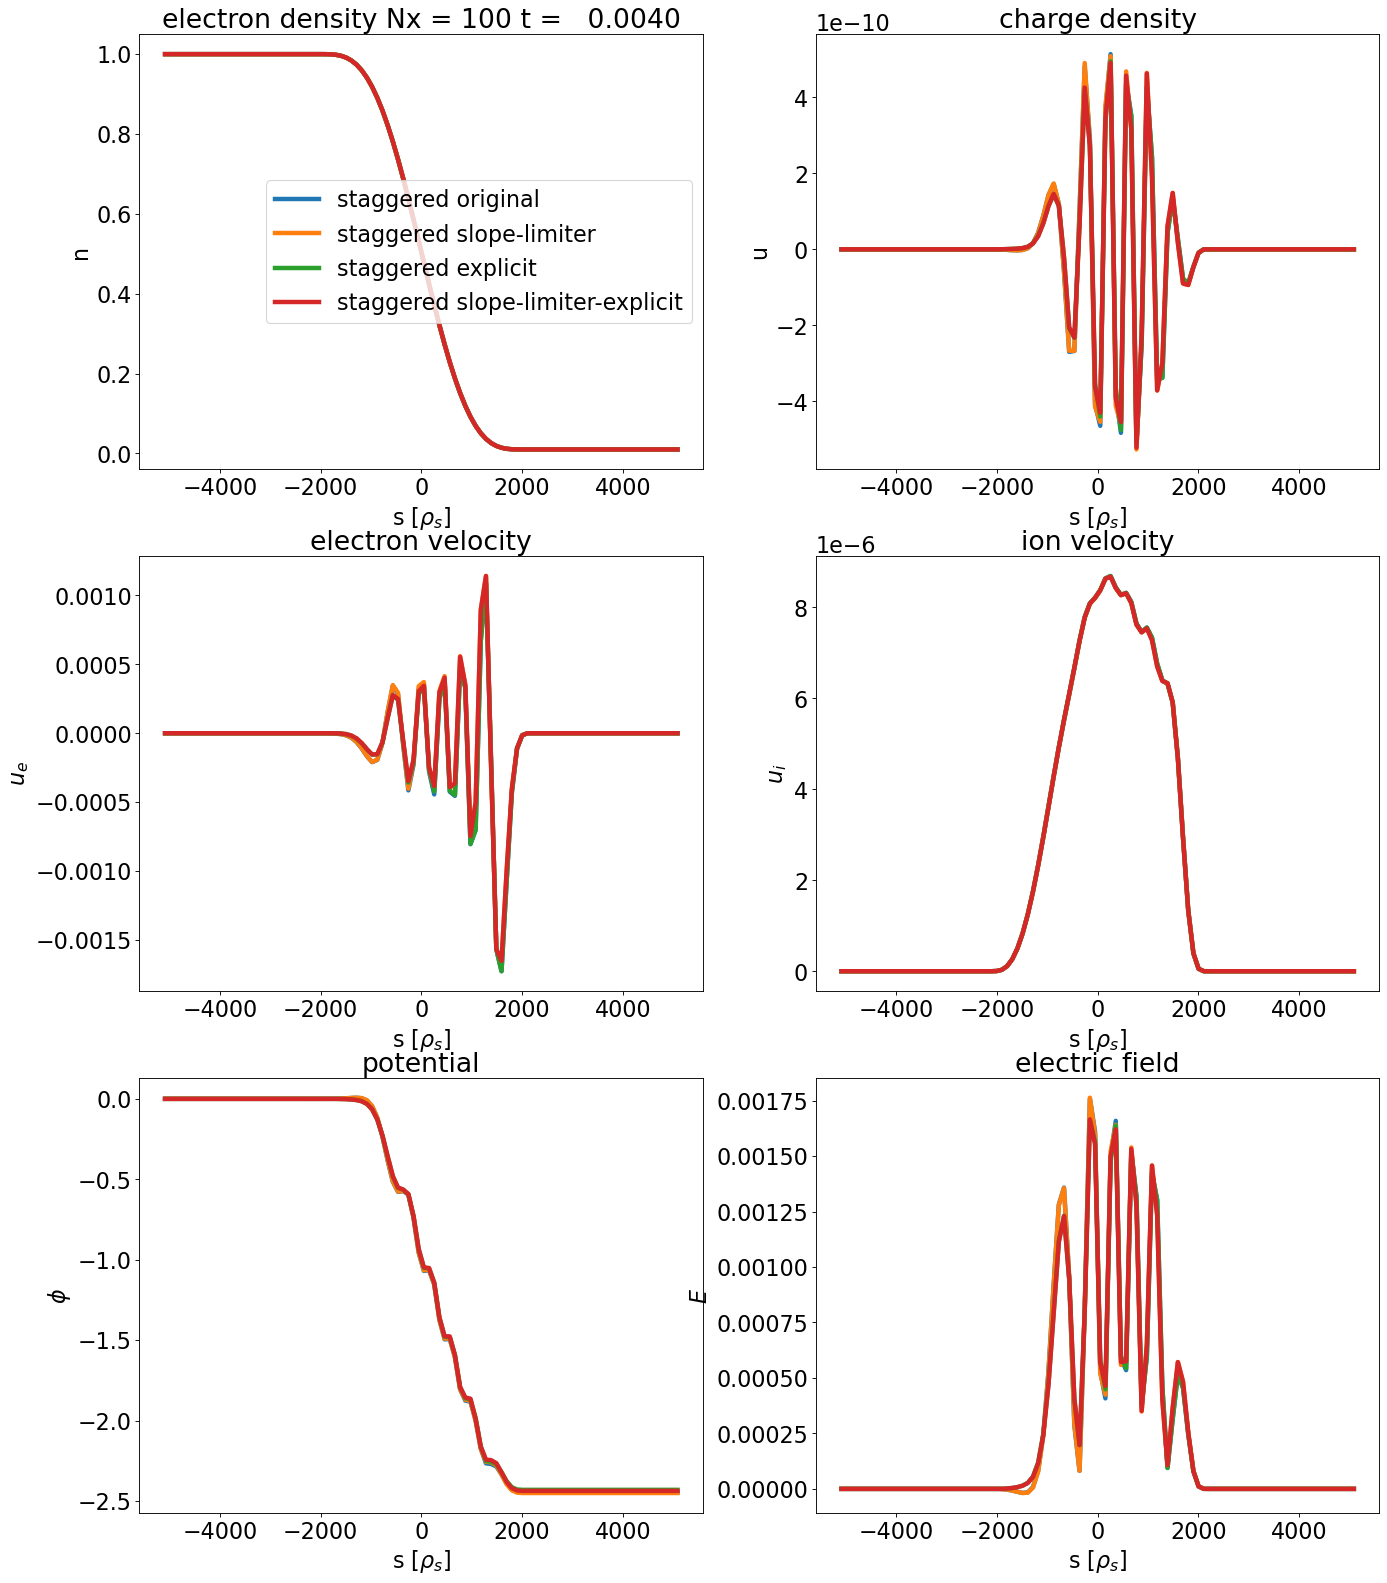

In [6]:
p_list = []
for p in [
    {"type" : "staggered", "variant" : "original"},
   {"type" : "staggered", "variant" : "slope-limiter"},
   {"type" : "staggered", "variant" : "explicit"},
   {"type" : "staggered", "variant" : "slope-limiter-explicit"},
#     {"type" : "centered"},
         ] :
    params = make_plasma_input(table)
    params["init"]["alpha"] = 0.4
    params["init"]["n_r"] = 0.01
    params["grid"]["Nx"]= 100
    params["output"]["tend"] =4e-3 #1e-4 to 1e-2
    params["timestepper"]["type"] = "ARK"
    params["timestepper"]["tableau"]  = "ARK-4-2-3"
    params["poisson"]["eps"]= 1e-12
    params["poisson"]["type"] = "bicgstab"
    #params["physical"]["mu"] = -1
    params["physical"]["nu_u"] = [0.,0.]
    params["physical"]["tau"] = 0.
    params["physical"]["type"] = "original"
    params["advection"] = p
    params["timestepper"]["rtol"] = 1e-5
    
    p_list.append(params)
plot_plasma(p_list)

We observe
- steps in the potential
- oscillations in the electron velocity and electric field indicating rapid plasma oscillations

staggered slope-limiter
Function Calls is 6553.0 Failed 335.0
staggered slope-limiter-explicit
Function Calls is 6578.0 Failed 348.0


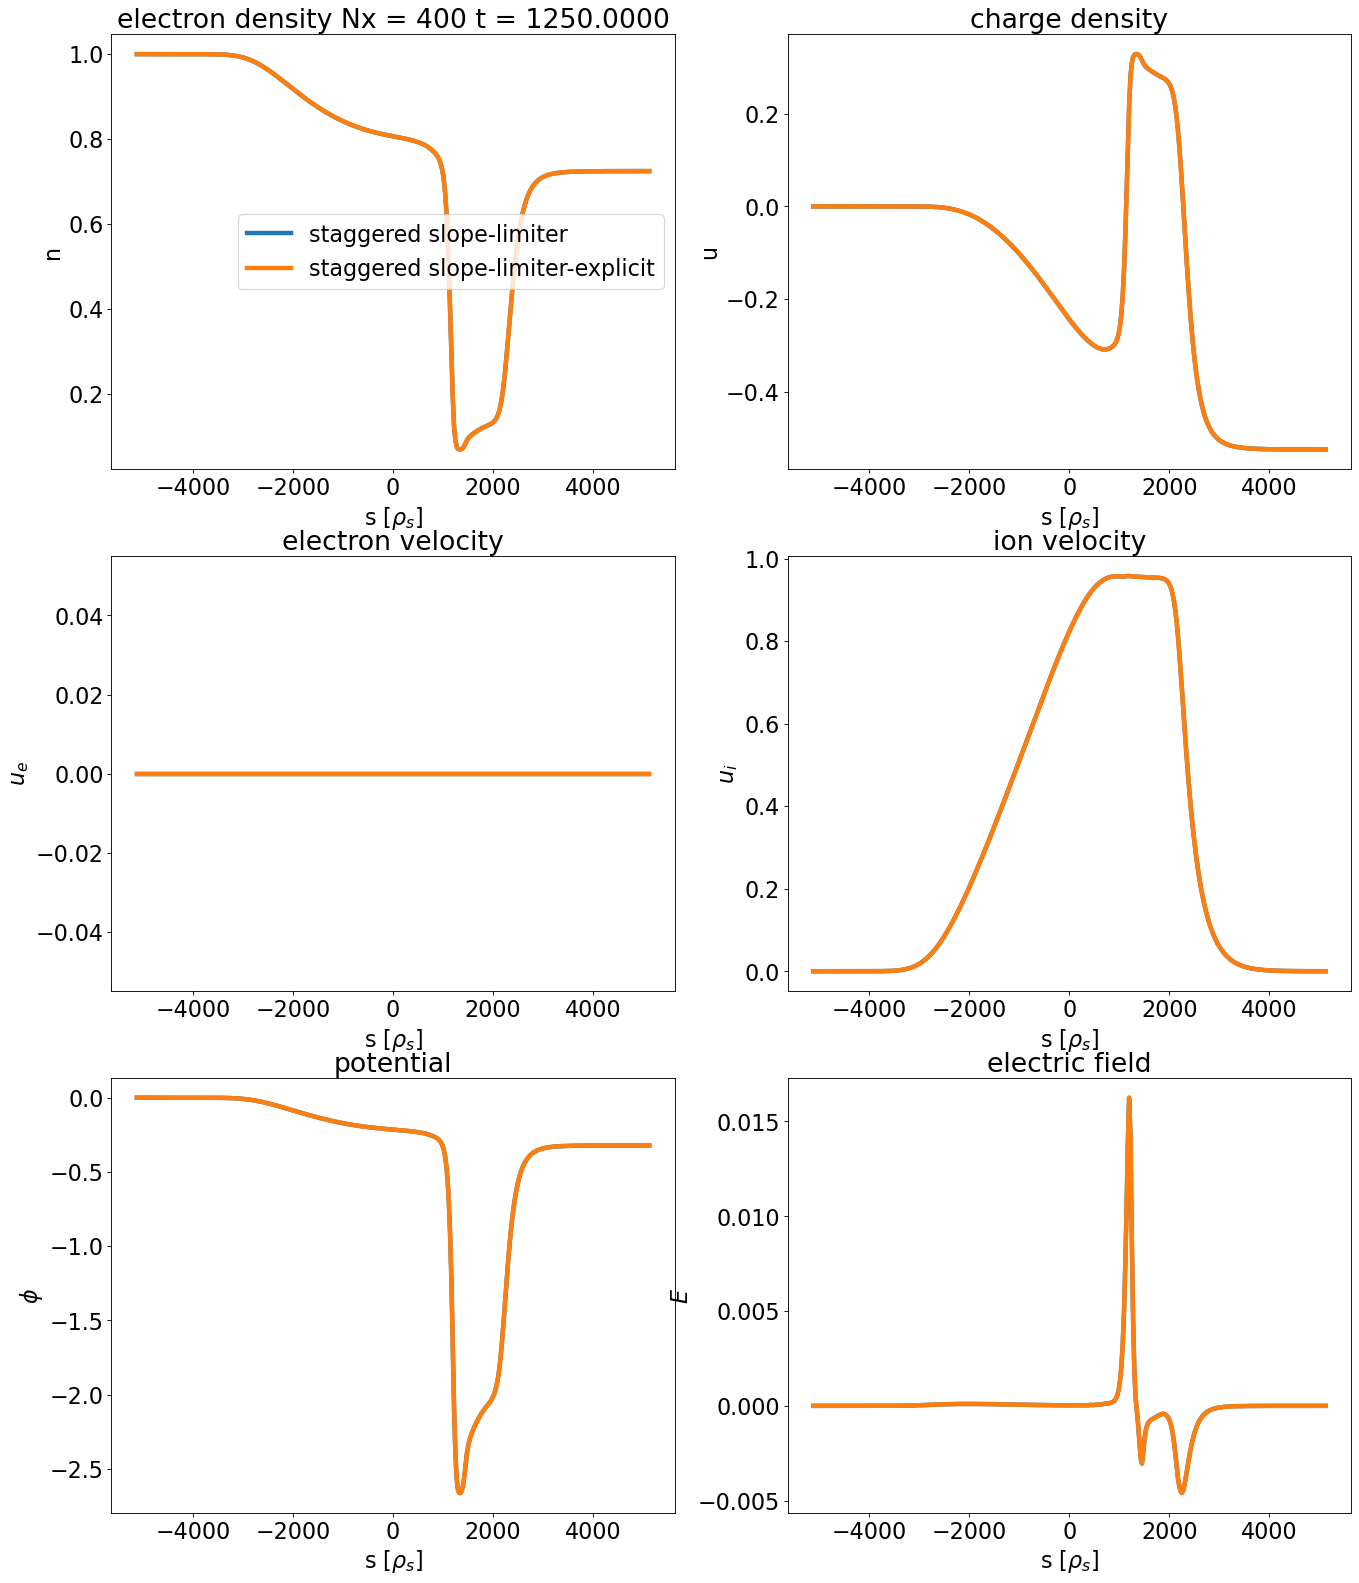

In [7]:
# Let us try adiabatic electrons
p_list = []
for p in [
#     {"type" : "staggered", "variant" : "original"},
    {"type" : "staggered", "variant" : "slope-limiter"},
#     {"type" : "staggered", "variant" : "explicit"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
#     {"type" : "centered"},
         ] :
    params = make_plasma_input(table)
    params["init"]["x_a"] = -0.0
    params["init"]["alpha"] = 0.001
    params["init"]["n_r"] = 0.2
    params["grid"]["Nx"]= 400
    params["output"]["tend"] =1.25e3#1e-4 to 1e-2
    params["timestepper"]["type"] = "ARK"
    params["timestepper"]["tableau"]  = "ARK-4-2-3"
    params["poisson"]["eps"]= 1e-12
    params["poisson"]["type"] = "anderson"
    params["poisson"]["damping"] = 1e-1
    #params["physical"]["mu"] = -1
#     params["physical"]["nu_u"] = [0.,0.]
    params["physical"]["tau"] =1.
    params["physical"]["type"] = "adiabatic"
    params["physical"]["resistivity"] = 0.0

    params["advection"] = p
    params["timestepper"]["rtol"] = 1e-5
    
    p_list.append(params)
plot_plasma(p_list)